
# Project 1: Gravitational Physics


In [2]:
from vpython import *
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## 1. Ball Falling Simulation

### 1.1 Without air resistance


__Verification:__
For verification of this simulation, on slide 61 of gravity_lecture_2234, we take advantage of the fact that it takes __4.518s__ to fall __100m__. So to see if the simulation is valid, we set run time __t__ run for __4.518__ seconds with __deltat = 0.01__ and __rate(100)__ to achieve real time
<br>
If the simulation is valid, the fall distance of the ball should be approximately __100m__ 
<br>
(result is under simulation canvas)
<br>
<br>
__Assumption:__
<br> 
Ball is only affected by Earth's gravitational force
<br>
Initial velocity = 0
<br>
ball's mass = 0.05kg
<br>
There is __no__ air resistance

In [3]:
scene = canvas()

# objects
ball = sphere(pos=vector(0,50,0), radius= 1, color=color.cyan,)
ground = box(pos=vector(0,0,0), size=vector(50,0.5,50), color=color.green)

# constants
initial_h = ball.pos.y
deltat = 0.01
vscale = 0.1
scene.autoscale = False

# initial condition
t = 0
ball.velocity = vector(0,0,0)
ball.m = 0.05
g = -9.8

while t < 4.518:
    rate(100)
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    t = t + deltat

# Verification
fall_h = ball.pos.y
dist = initial_h - fall_h
print("Travel distance: " + str(dist))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Travel distance: 100.33043999999973



### 1.2 Maximum velocity plot at different initial heights


Text(0.5, 1.0, 'Initial Heights vs Max Velocity')

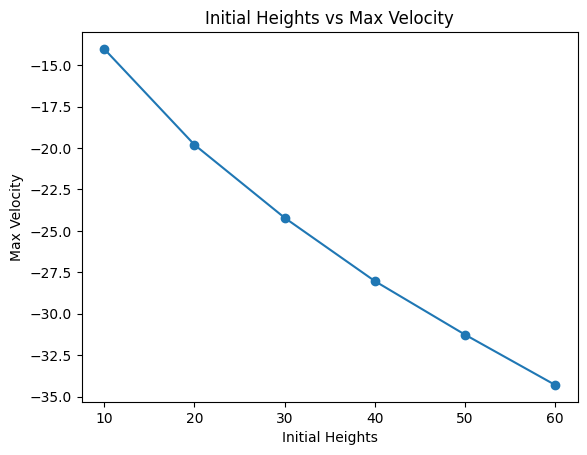

In [11]:
# Import
%matplotlib inline

# Constants
deltat = 0.01
initial_h = np.array([10, 20, 30, 40, 50, 60])
max_v = []
v = 0
g = -9.8
h = 0

for height in initial_h:
    h = height
    v = 0
    while h > 0: 
        v = v + g*deltat
        h = h + v*deltat
    t = t + deltat
    max_v.append(v)

plt.scatter(initial_h, max_v, label="Legend_label")
plt.plot(initial_h, max_v, label="Legend_label")
plt.xlabel("Initial Heights")
plt.ylabel("Max Velocity")
plt.title("Initial Heights vs Max Velocity")
    


### 1.3 With air resistance


__Assumption:__
<br>
Initial height: 50m
<br>
Ball's mass: 0.05kg
<br>
Rho: density of air = 1.2
<br>
Actual ball's radius: 0.05m
<br>
Drag coefficient of a sphere: 0.5

In [4]:
# imports
scene = canvas()

# objects
ball = sphere(pos=vector(0,50,0), radius= 1, color=color.cyan, make_trail=True)
ground = box(pos=vector(0,0,0), size=vector(50,0.5,50), color=color.green)

# constants
t = 0
deltat = 0.01
vscale = 0.1
scene.autoscale = False

# initial condition
initial_h = ball.pos.y
ball.velocity = vector(0,0,0)
ball.m = 0.05
g = vector(0, -9.8, 0)
ball.p = ball.m * ball.velocity      # momentum
p = 1.2                            # density of air
R = 0.05
A = pi * R **2              # reference area
C = 0.5                            # drag coefficient of a sphere

# main loop
while t < 4.518:
    rate(100)
    
    ball.velocity = ball.p/ball.m
    F = ball.m*g
    Fnet = ball.m*g - 0.5*p*A*C*(mag(ball.velocity)**2)*norm(ball.velocity)
    ball.p = ball.p + Fnet*deltat
    ball.pos = ball.pos + ball.p*deltat/ball.m
    t = t + deltat
    
# Fall distance
fall_h = ball.pos.y
dist = initial_h - fall_h
print("Travel distance: " + str(dist))

<IPython.core.display.Javascript object>

Travel distance: 50.633170340315054



### 1.4 Trajectories with Resistance vs Trajectories without Air Resistance



__Source & Reference__
<br>
Air Drag equation: https://www.grc.nasa.gov/www/k-12/rocket/drageq.html
<br>
Drag Coefficient of a sphere: https://www.engineeringtoolbox.com/drag-coefficient-d_627.html
<br>
Air density: https://www.earthdata.nasa.gov/topics/atmosphere/atmospheric-pressure/air-mass-density#:~:text=Pure%2C%20dry%20air%20has%20a,of%20at%20least%2050%20km.
<br>
Python Physics Lesson: https://www.youtube.com/watch?v=aKI0Zz41GZY



__Assumption:__
<br>
Ball 1's and Ball 2's initial heigt = 5m
<br>
Ball 1's mass = ball 2's mass = 0.05kg
<br>
ball 1's velocity vector = ball's 2 velocity vector = (10,20,0)
Rho: density of air = 1.2
<br>
Actual ball's radius: 0.05m
<br>
Drag coefficient of a sphere: 0.5
<br>
<br>
Ball 1 is __not__ affected by air resistance
<br>
Ball 2 is affected by air resistance

In [5]:
# imports
scene = canvas()

# objects
ball1 = sphere(pos=vector(-20,5,0), radius= 1, color=color.cyan, make_trail=True)
ball2 = sphere(pos=vector(-20,5,0), radius= 1, color=color.yellow, make_trail=True)
ground = box(pos=vector(0,0,0), size=vector(50,0.5,50), color=color.green)

# constants
t = 0
deltat = 0.01
vscale = 0.1
scene.autoscale = False

# initial condition
# ball 1 (no air resistance)
ball1.v = vector(10,20,0)
ball1.m = 0.05

# ball 2 (with air resistance)
ball2.v = vector(10,20,0)
ball2.m = 0.05

g = vector(0, -9.8, 0)
ball1.p = ball1.m * ball1.v      # momentum
ball2.p = ball2.m * ball2.v 
p = 1.293                            # density of air
R = 0.05
A = pi * R **2              # reference area
C = 0.5                            # drag coefficient of a sphere

# main loop
while t < 7:
    rate(100)
    # updating ball 1 momentum, velocity and position
    ball1.v = ball1.p/ball1.m
    F = ball1.m*g
    ball1.p = ball1.p + F*deltat
    ball1.pos = ball1.pos + ball1.p*deltat/ball1.m
    if (ball1.pos.y < ground.pos.y + 0.3):
        ball1.p.y = -ball1.p.y
        
    # updating ball 2 momentum, velocity and position
    ball2.v = ball2.p/ball2.m
    Fnet = ball2.m*g - 0.5*p*A*C*(mag(ball2.v)**2)*norm(ball2.v)
    ball2.p = ball2.p + Fnet*deltat
    ball2.pos = ball2.pos + ball2.p*deltat/ball2.m
    if (ball2.pos.y < ground.pos.y + 0.3):
        ball2.p.y = -ball2.p.y
    
    t = t + deltat
    


<IPython.core.display.Javascript object>


Ball 1 is simulated without air resistance as its force = mg while ball 2 has air resistance implemented as its Fnet in motion is F(mg) - FD (drag force). In the visual simulation result we see that ball 1 without air resistance travel way further than ball 2 as it has much higher max height. On the other hand in reality, ball 2 with air resistance have lower max height due to gravity and after a few bounce, the max height decreases. We can see a big difference between the 2 ball even though they have the same initial velocity.



## 2. Ball Bouncing


 ### 1. Elastic Collision
 

__Assumption:__
<br>
No Kinetic Energy is lost during impact
<br>
Ball's velocity = 0m/s
<br>
Ball's initial height = 35m

In [7]:
scene = canvas()

# objects
ball = sphere(pos=vector(0,35,0), radius= 1, color=color.cyan, make_trail=True)
ground = box(pos=vector(0,0,0), size=vector(50,0.5,50), color=color.green)

# constants
deltat = 0.01
vscale = 0.1
scene.autoscale = False

# initial condition
t = 0
ball.velocity = vector(0,0,0)
varr = arrow(pos=ball.pos, axis=vscale*ball.velocity, color=color.yellow)
g = 9.8

while t < 10:
    rate(100)
    ball.velocity.y = ball.velocity.y + g*deltat
    ball.pos = ball.pos - ball.velocity*deltat
    if (ball.pos.y < ground.pos.y) :
        ball.velocity.y = -ball.velocity.y
    t = t + deltat

<IPython.core.display.Javascript object>


### 2. Inelastic Collision



__Source & Reference__
<br>
Coefficient of Restitution: https://iopscience.iop.org/article/10.1088/1757-899X/36/1/012038/pdf
<br>
Elastic vs Inelastic Collisions: https://www.khanacademy.org/science/physics/linear-momentum/elastic-and-inelastic-collisions/a/what-are-elastic-and-inelastic-collisions
<br>
Ball Bouncing Inelastic Collision: https://www.teachengineering.org/lessons/view/cub_energy_lesson03#:~:text=inelastic%20collision%3A%20A%20collision%20in,partially%20to%20its%20original%20height.



__Assumptions/Decision__
To simulate the inelastic collision scenario of a bouncing ball to be the most precise, we will be using variables discovered in the research paper about the Coefficient of Restitution above. To be precise, we will be simulating a __golf ball__ bouncing on a __wood__ surface. From the study above, we will use the value of __0.675__ for the coefficient of restitution for a golf ball on a wood surface and __0.046kg__ as mass of the golf ball


In [8]:
# imports
scene = canvas()

# objects
ball = sphere(pos=vector(0,60,0), radius= 1, color=color.white, make_trail=True)
ground = box(pos=vector(0,0,0), size=vector(50,0.5,50), color=vector(1,0.6,0.4))

# constants
t = 0
deltat = 0.01
vscale = 0.1
scene.autoscale = False

# initial condition
initial_h = ball.pos.y
ball.v = vector(0,0,0)
ball.m = 0.046
g = vector(0, -9.8, 0)
C = 0.675
ball.p = ball.m * ball.v      # momentum
PE = ball.m*-g*initial_h         # Potential Energy

# main loop
while t < 15:
    rate(100)
    ball.v = ball.v + g*deltat
    ball.pos = ball.pos + ball.v*deltat
    if (ball.pos.y < ground.pos.y) :
        ball.v = -C*ball.v
    t = t + deltat
    

<IPython.core.display.Javascript object>

## 3. Ball Launched from Cannon under Earth's gravity


__Verification:__
<br>
For verification of this simulation, we will compare the theoretical distance of ball 1 vs the distance it travels in the simulation. 
<br>
<br>
We will be using the projectile equation: __x = x0 + vx*t__
<br>
<br>
With this, the theoretical distance ball 1 travel is 220m
<br>
<br>
__Assumption:__
<br>
All three balls will __NOT__ be affected by air resistance
<br>
All three balls will be affected by Earth's gravity
<br>
Ball 1's initial velocity vector = (22,30,0) m/s
<br>
Ball 2's initial velocity vector = (8,30,0) m/s
<br>
Ball 3's initial velocity vector = (30,5,0) m/s
<br>

In [9]:
scene = canvas()

# objects
ball1 = sphere(pos=vector(-84,11,0), radius= 1, color=color.cyan, make_trail=True)
ball2 = sphere(pos=vector(-78,11,0), radius= 1, color=color.yellow, make_trail=True)
ball3 = sphere(pos=vector(-60,5,0), radius= 1, color=color.red, make_trail=True)
initial_pos = ball1.pos.x

ground = box(pos=vector(0,0,0), size=vector(200,0.5,40), color=color.green)
l_wheel1 = cylinder(pos=vector(-90,2.5,-3), axis=vector(0,0,1), radius = 2.5)
r_wheel1 = cylinder(pos=vector(-90,2.5,2), axis=vector(0,0,1), radius = 2.5)
cannon1 = cylinder(pos=vector(-90,2,0), axis=vector(6,9,0), radius = 2)

l_wheel2 = cylinder(pos=vector(-80,2.5,-3), axis=vector(0,0,1), radius = 2.5)
r_wheel2 = cylinder(pos=vector(-80,2.5,2), axis=vector(0,0,1), radius = 2.5)
cannon2 = cylinder(pos=vector(-80,2,0), axis=vector(2,10,0), radius = 2)

l_wheel2 = cylinder(pos=vector(-70,2.5,-3), axis=vector(0,0,1), radius = 2.5)
r_wheel2 = cylinder(pos=vector(-70,2.5,2), axis=vector(0,0,1), radius = 2.5)
cannon2 = cylinder(pos=vector(-70,2,0), axis=vector(9,3,0), radius = 2)

# constants
deltat = 0.01
vscale = 0.1
scene.autoscale = False

# initial condition
t = 0

ball1.velocity = vector(22,30,0)
varr1 = arrow(pos=ball1.pos, axis=0.2*ball1.velocity, color=color.yellow)

ball2.velocity = vector(8,30,0)
varr2 = arrow(pos=ball2.pos, axis=0.2*ball2.velocity, color=color.yellow)

ball3.velocity = vector(30,5,0)
varr3 = arrow(pos=ball3.pos, axis=0.2*ball3.velocity, color=color.yellow)

g = vector(0,-9.8,0)

while t < 10:
    rate(100)
    
    ball1.velocity = ball1.velocity + g*deltat
    ball1.pos = ball1.pos + ball1.velocity*deltat
    if (ball1.pos.y < ground.pos.y) :
        ball1.velocity.y = -ball1.velocity.y
        
    ball2.velocity = ball2.velocity + g*deltat
    ball2.pos = ball2.pos + ball2.velocity*deltat
    if (ball2.pos.y < ground.pos.y) :
        ball2.velocity.y = -ball2.velocity.y
        
    ball3.velocity = ball3.velocity + g*deltat
    ball3.pos = ball3.pos + ball3.velocity*deltat
    if (ball3.pos.y < ground.pos.y) :
        ball3.velocity.y = -ball3.velocity.y
        
    t = t + deltat
    
# Verification: Theoretical vs Simulation
#Theoretical travel distance: 
T_dist = ball1.velocity.x*10
print("Theoretical travel distance: " + str(T_dist))

#Simulation travel distance:
S_dist = ball1.pos.x + abs(initial_pos)
print("Simulation travel distance: " + str(S_dist))

<IPython.core.display.Javascript object>

Theoretical travel distance: 220.0
Simulation travel distance: 220.2199999999991
